# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import datetime
import numpy as np
## Load the data into a DataFrame
df = pd.read_csv('../Assets/Project3/Iowa_Liquor_sales_sample_10pct.csv')

## Transforming the dates to pandas datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [2]:
#Eliminating unnecessary strings and converting them to floats
for column in df[['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']]:
    df[column]= df[column].str.replace('$','')
    df[column].astype(float)

df[['State Bottle Cost','State Bottle Retail', 'Sale (Dollars)']] = df[['State Bottle Cost'\
                                            ,'State Bottle Retail', 'Sale (Dollars)']].apply(pd.to_numeric)




In [3]:
df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [4]:
df.isnull().any()

Date                     False
Store Number             False
City                     False
Zip Code                 False
County Number             True
County                    True
Category                  True
Category Name             True
Vendor Number            False
Item Number              False
Item Description         False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
dtype: bool

In [5]:
df.dropna()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


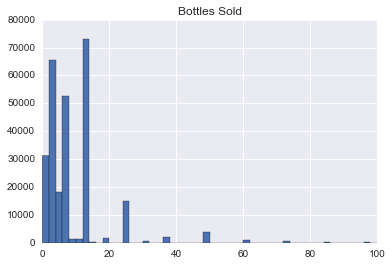

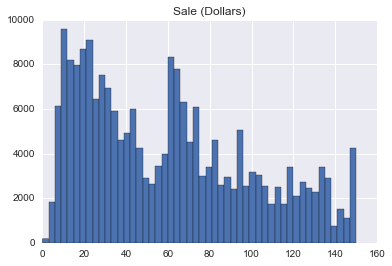

In [7]:
#Plotting histograms of possibly relevant columns of the DataFrame to see the shape of the data
plt.hist(df['Bottles Sold'],bins=50, range=(0,100))
plt.title('Bottles Sold')
plt.show()
plt.hist(df['Sale (Dollars)'], bins=50, range=(0,150))
plt.title('Sale (Dollars)')
plt.show()



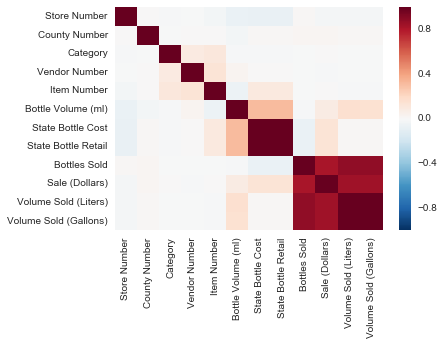

In [8]:
#Heatmap of correlations in the DataFrame
sns.heatmap(df.corr())

In [9]:
#Number of columns
df.shape

(270955, 18)

In [10]:
df.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [11]:
#Creating DataFrame for all of 2015 data
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
lySales = df[mask]


lySales = lySales.groupby(by=["Store Number"], as_index=False)

#aggregating sums for necessary columns
lySales = lySales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Zip Code": lambda x: x.iloc[0], 
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0],
                   "Category":lambda x: x.iloc[0],
                   "Category Name":lambda x: x.iloc[0]})    
#Separating aggregated values into their own columns
lySales.columns = [''.join(col).strip() for col in lySales.columns.values]

lySales.sort_values('Store Number', inplace=True)
print lySales.shape
lySales.head()


(1372, 10)


,Store Number,Category<lambda>,City<lambda>,Sale (Dollars)sum,Sale (Dollars)mean,Zip Code<lambda>,County Number<lambda>,Category Name<lambda>,Volume Sold (Liters)sum,Volume Sold (Liters)mean
0,2106,1062200.0,CEDAR FALLS,146326.22,277.658861,50613,7.0,PUERTO RICO & VIRGIN ISLANDS RUM,9731.85,18.466509
1,2113,1062310.0,GOWRIE,9310.22,63.334830,50543,94.0,SPICED RUM,659.85,4.488776
2,2130,1081390.0,WATERLOO,111871.43,285.386301,50703,7.0,IMPORTED SCHNAPPS,6891.37,17.580026
3,2152,1011300.0,ROCKWELL,7721.08,54.759433,50469,17.0,TENNESSEE WHISKIES,633.37,4.491986
4,2178,1081030.0,WAUKON,24324.18,102.633671,52172,3.0,COFFEE LIQUEURS,1917.12,8.089114


In [12]:
#Creating DataFrame for first quarter of 2015
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
qSales = df[mask]


qSales = qSales.groupby(by=["Store Number"], as_index=False)

#aggregating sums for necessary columns
qSales = qSales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Zip Code": lambda x: x.iloc[0], 
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0],
                   "Category": lambda x: x.iloc[0],
                   "Category Name": lambda x: x.iloc[0]})
#Separating aggregated values into their own columns
qSales.columns = [''.join(col).strip() for col in qSales.columns.values]

qSales.sort_values('Store Number', inplace=True)
print qSales.shape
qSales.head()

(1262, 10)


,Store Number,Category<lambda>,City<lambda>,Sale (Dollars)sum,Sale (Dollars)mean,Zip Code<lambda>,County Number<lambda>,Category Name<lambda>,Volume Sold (Liters)sum,Volume Sold (Liters)mean
0,2106,1062200.0,CEDAR FALLS,39287.29,304.552636,50613,7.0,PUERTO RICO & VIRGIN ISLANDS RUM,2526.10,19.582171
1,2113,1062310.0,GOWRIE,2833.25,67.458333,50543,94.0,SPICED RUM,177.11,4.216905
2,2130,1081390.0,WATERLOO,24272.57,278.995057,50703,7.0,IMPORTED SCHNAPPS,1447.25,16.635057
3,2152,1011300.0,ROCKWELL,2003.46,62.608125,50469,17.0,TENNESSEE WHISKIES,151.74,4.741875
4,2178,1081030.0,WAUKON,5856.41,122.008542,52172,3.0,COFFEE LIQUEURS,409.81,8.537708


In [13]:
#Creating DataFrame with current, up to date data from 2016
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20160101")
mask = (df['Date'] >= start_date) 
SalesQ116 = df[mask]


SalesQ116 = SalesQ116.groupby(by=["Store Number"], as_index=False)
#aggregating sums for necessary columns
SalesQ116 = SalesQ116.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Zip Code": lambda x: x.iloc[0], 
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0],
                   "Category":lambda x: x.iloc[0],
                   "Category Name":lambda x: x.iloc[0]})    
#Separating aggregated values into their own columns
SalesQ116.columns = [''.join(col).strip() for col in SalesQ116.columns.values]

SalesQ116.sort_values('Store Number', inplace=True)
print SalesQ116.shape
SalesQ116.head()

(1309, 10)


,Store Number,Category<lambda>,City<lambda>,Sale (Dollars)sum,Sale (Dollars)mean,Zip Code<lambda>,County Number<lambda>,Category Name<lambda>,Volume Sold (Liters)sum,Volume Sold (Liters)mean
0,2106,1011200.0,CEDAR FALLS,30523.75,240.344488,50613,7.0,STRAIGHT BOURBON WHISKIES,2117.75,16.675197
1,2113,1031100.0,GOWRIE,2065.90,55.835135,50543,94.0,100 PROOF VODKA,177.00,4.783784
2,2130,1042100.0,WATERLOO,27856.11,238.086410,50703,7.0,IMPORTED DRY GINS,1556.90,13.306838
3,2152,1081315.0,ROCKWELL,1376.43,45.881000,50469,17.0,CINNAMON SCHNAPPS,140.13,4.671000
4,2178,1031080.0,WAUKON,5588.50,96.353448,52172,3.0,VODKA 80 PROOF,520.80,8.979310


In [14]:
#Renaming columns and dropping nulls 
SalesQ116.columns = ['StoreNumber16', 'Category', 'City',
       'Predictor', 'SaleMean16', 'ZipCode16',
       'CountyNumber16', 'CategoryName16',
       'VolumeSoldSum16', 'VolumeSoldMean16']
SalesQ116.dropna()
SalesQ116.head()

,StoreNumber16,Category,City,Predictor,SaleMean16,ZipCode16,CountyNumber16,CategoryName16,VolumeSoldSum16,VolumeSoldMean16
0,2106,1011200.0,CEDAR FALLS,30523.75,240.344488,50613,7.0,STRAIGHT BOURBON WHISKIES,2117.75,16.675197
1,2113,1031100.0,GOWRIE,2065.90,55.835135,50543,94.0,100 PROOF VODKA,177.00,4.783784
2,2130,1042100.0,WATERLOO,27856.11,238.086410,50703,7.0,IMPORTED DRY GINS,1556.90,13.306838
3,2152,1081315.0,ROCKWELL,1376.43,45.881000,50469,17.0,CINNAMON SCHNAPPS,140.13,4.671000
4,2178,1031080.0,WAUKON,5588.50,96.353448,52172,3.0,VODKA 80 PROOF,520.80,8.979310


In [15]:
#Merging complete 2015 DataFrame with Q1 2015 DataFrame 
lySales = pd.merge(lySales, qSales, on='Store Number')

lySales.dropna()

,Store Number,Category<lambda>_x,City<lambda>_x,Sale (Dollars)sum_x,Sale (Dollars)mean_x,Zip Code<lambda>_x,County Number<lambda>_x,Category Name<lambda>_x,Volume Sold (Liters)sum_x,Volume Sold (Liters)mean_x,Category<lambda>_y,City<lambda>_y,Sale (Dollars)sum_y,Sale (Dollars)mean_y,Zip Code<lambda>_y,County Number<lambda>_y,Category Name<lambda>_y,Volume Sold (Liters)sum_y,Volume Sold (Liters)mean_y
0,2106,1062200.0,CEDAR FALLS,146326.22,277.658861,50613,7.0,PUERTO RICO & VIRGIN ISLANDS RUM,9731.85,18.466509,1062200.0,CEDAR FALLS,39287.29,304.552636,50613,7.0,PUERTO RICO & VIRGIN ISLANDS RUM,2526.10,19.582171
1,2113,1062310.0,GOWRIE,9310.22,63.334830,50543,94.0,SPICED RUM,659.85,4.488776,1062310.0,GOWRIE,2833.25,67.458333,50543,94.0,SPICED RUM,177.11,4.216905
2,2130,1081390.0,WATERLOO,111871.43,285.386301,50703,7.0,IMPORTED SCHNAPPS,6891.37,17.580026,1081390.0,WATERLOO,24272.57,278.995057,50703,7.0,IMPORTED SCHNAPPS,1447.25,16.635057
3,2152,1011300.0,ROCKWELL,7721.08,54.759433,50469,17.0,TENNESSEE WHISKIES,633.37,4.491986,1011300.0,ROCKWELL,2003.46,62.608125,50469,17.0,TENNESSEE WHISKIES,151.74,4.741875
4,2178,1081030.0,WAUKON,24324.18,102.633671,52172,3.0,COFFEE LIQUEURS,1917.12,8.089114,1081030.0,WAUKON,5856.41,122.008542,52172,3.0,COFFEE LIQUEURS,409.81,8.537708
5,2190,1052010.0,DES MOINES,121689.06,92.539209,50314,77.0,IMPORTED GRAPE BRANDIES,6322.17,4.807734,1052010.0,DES MOINES,29452.92,84.878732,50314,77.0,IMPORTED GRAPE BRANDIES,1666.58,4.802824
6,2191,1081200.0,KEOKUK,125093.49,209.888406,52632,56.0,CREAM LIQUEURS,8053.32,13.512282,1081200.0,KEOKUK,29085.57,192.619669,52632,56.0,CREAM LIQUEURS,1957.28,12.962119
7,2200,1081600.0,SAC CITY,22811.55,56.604342,50583,81.0,WHISKEY LIQUEUR,1817.24,4.509280,1081600.0,SAC CITY,4900.43,58.338452,50583,81.0,WHISKEY LIQUEUR,367.72,4.377619
8,2205,1011100.0,CLARINDA,24681.39,85.699271,51632,73.0,BLENDED WHISKIES,1556.91,5.405937,1011100.0,CLARINDA,6407.74,91.539143,51632,73.0,BLENDED WHISKIES,375.38,5.362571
9,2228,1081305.0,WINTERSET,17462.07,72.758625,50273,61.0,APPLE SCHNAPPS,1367.65,5.698542,1081305.0,WINTERSET,5193.97,86.566167,50273,61.0,APPLE SCHNAPPS,405.62,6.760333


In [16]:
#Renaming columns in merged column, 'Predictor' is the name of the Q1 2015 sale data, is named this way to make plugging
#it into the model easier later

lySales.columns = [u'StoreNumber15', u'Category15', u'City15',
       u'SaleSum15', u'SaleMean15', u'ZipCode15',
       u'CountyNumber15', u'CategoryName15',
       u'VolumeSoldSumL15', u'VolumeSoldMeanL15',
       u'CategoryQ115', u'CityQ115', u'Predictor',
       u'SaleMeanQ115', u'ZipCodeQ115',
       u'CountyNumberQ115', u'CategoryNameQ115',
       u'VolumeSoldSumLQ115', u'VolumeSoldMeanQ115']
lySales.head()

,StoreNumber15,Category15,City15,SaleSum15,SaleMean15,ZipCode15,CountyNumber15,CategoryName15,VolumeSoldSumL15,VolumeSoldMeanL15,CategoryQ115,CityQ115,Predictor,SaleMeanQ115,ZipCodeQ115,CountyNumberQ115,CategoryNameQ115,VolumeSoldSumLQ115,VolumeSoldMeanQ115
0,2106,1062200.0,CEDAR FALLS,146326.22,277.658861,50613,7.0,PUERTO RICO & VIRGIN ISLANDS RUM,9731.85,18.466509,1062200.0,CEDAR FALLS,39287.29,304.552636,50613,7.0,PUERTO RICO & VIRGIN ISLANDS RUM,2526.10,19.582171
1,2113,1062310.0,GOWRIE,9310.22,63.334830,50543,94.0,SPICED RUM,659.85,4.488776,1062310.0,GOWRIE,2833.25,67.458333,50543,94.0,SPICED RUM,177.11,4.216905
2,2130,1081390.0,WATERLOO,111871.43,285.386301,50703,7.0,IMPORTED SCHNAPPS,6891.37,17.580026,1081390.0,WATERLOO,24272.57,278.995057,50703,7.0,IMPORTED SCHNAPPS,1447.25,16.635057
3,2152,1011300.0,ROCKWELL,7721.08,54.759433,50469,17.0,TENNESSEE WHISKIES,633.37,4.491986,1011300.0,ROCKWELL,2003.46,62.608125,50469,17.0,TENNESSEE WHISKIES,151.74,4.741875
4,2178,1081030.0,WAUKON,24324.18,102.633671,52172,3.0,COFFEE LIQUEURS,1917.12,8.089114,1081030.0,WAUKON,5856.41,122.008542,52172,3.0,COFFEE LIQUEURS,409.81,8.537708


# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [17]:
#Correlation table of merged table
lySales.corr()

,StoreNumber15,Category15,SaleSum15,SaleMean15,CountyNumber15,VolumeSoldSumL15,VolumeSoldMeanL15,CategoryQ115,Predictor,SaleMeanQ115,CountyNumberQ115,VolumeSoldSumLQ115,VolumeSoldMeanQ115
StoreNumber15,1.000000,-0.075845,-0.347907,0.025669,-0.009329,-0.386038,-0.048504,-0.075845,-0.342922,0.001443,-0.009329,-0.383612,-0.057226
Category15,-0.075845,1.000000,0.072355,0.049023,-0.040497,0.071411,0.037454,1.000000,0.071760,0.035523,-0.040497,0.068730,0.003377
SaleSum15,-0.347907,0.072355,1.000000,0.424913,0.044452,0.992406,0.412611,0.072355,0.981456,0.404095,0.044452,0.964915,0.356906
SaleMean15,0.025669,0.049023,0.424913,1.000000,0.010075,0.417298,0.911271,0.049023,0.397049,0.899463,0.010075,0.384966,0.767341
CountyNumber15,-0.009329,-0.040497,0.044452,0.010075,1.000000,0.036670,-0.015606,-0.040497,0.048110,0.007427,1.000000,0.039755,-0.029027
VolumeSoldSumL15,-0.386038,0.071411,0.992406,0.417298,0.036670,1.000000,0.434241,0.071411,0.972804,0.397817,0.036670,0.970621,0.377593
VolumeSoldMeanL15,-0.048504,0.037454,0.412611,0.911271,-0.015606,0.434241,1.000000,0.037454,0.390932,0.849466,-0.015606,0.407061,0.862551
CategoryQ115,-0.075845,1.000000,0.072355,0.049023,-0.040497,0.071411,0.037454,1.000000,0.071760,0.035523,-0.040497,0.068730,0.003377
Predictor,-0.342922,0.071760,0.981456,0.397049,0.048110,0.972804,0.390932,0.071760,1.000000,0.421439,0.048110,0.986705,0.385705
SaleMeanQ115,0.001443,0.035523,0.404095,0.899463,0.007427,0.397817,0.849466,0.035523,0.421439,1.000000,0.007427,0.414763,0.885104


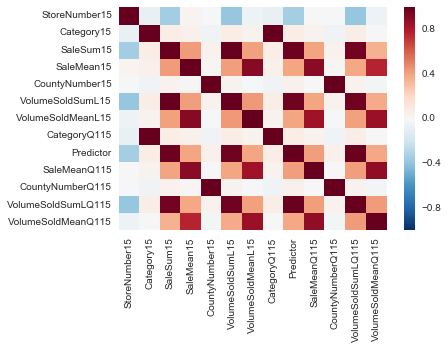

In [18]:
#Heatmap of same table
sns.heatmap(lySales.corr())

In [19]:
#Correlation table for Q1 2015 to see if it looks similar to the table above
qSales.corr()

,Store Number,Category<lambda>,Sale (Dollars)sum,Sale (Dollars)mean,County Number<lambda>,Volume Sold (Liters)sum,Volume Sold (Liters)mean
Store Number,1.000000,-0.075845,-0.342922,0.001443,-0.009329,-0.383612,-0.057226
Category<lambda>,-0.075845,1.000000,0.071760,0.035523,-0.040497,0.068730,0.003377
Sale (Dollars)sum,-0.342922,0.071760,1.000000,0.421439,0.048110,0.986705,0.385705
Sale (Dollars)mean,0.001443,0.035523,0.421439,1.000000,0.007427,0.414763,0.885104
County Number<lambda>,-0.009329,-0.040497,0.048110,0.007427,1.000000,0.039755,-0.029027
Volume Sold (Liters)sum,-0.383612,0.068730,0.986705,0.414763,0.039755,1.000000,0.426218
Volume Sold (Liters)mean,-0.057226,0.003377,0.385705,0.885104,-0.029027,0.426218,1.000000


In [20]:
#Ensuring data types are what they should be
lySales.dtypes

StoreNumber15           int64
Category15            float64
City15                 object
SaleSum15             float64
SaleMean15            float64
ZipCode15              object
CountyNumber15        float64
CategoryName15         object
VolumeSoldSumL15      float64
VolumeSoldMeanL15     float64
CategoryQ115          float64
CityQ115               object
Predictor             float64
SaleMeanQ115          float64
ZipCodeQ115            object
CountyNumberQ115      float64
CategoryNameQ115       object
VolumeSoldSumLQ115    float64
VolumeSoldMeanQ115    float64
dtype: object

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [65]:
import statsmodels.formula.api as smf

#Model using Q1 2015 data as a predictor for the rest of the 2015 data
lm1 = smf.ols(formula='SaleSum15  ~ Predictor', data=lySales)

model = lm1.fit_regularized()#using buit in regularization

predictions1= model.predict(lySales[['Predictor']])

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SaleSum15   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 3.303e+04
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        09:22:04   Log-Likelihood:                -13428.
No. Observations:                1262   AIC:                         2.686e+04
Df Residuals:                    1260   BIC:                         2.687e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    280.5247    309.006      0.908      0.364      -325.698   886.747
Predictor      4.4710      0.025    181.744      0.000         4.423     4.519
==============================================================================
Omnibus:                      609.164   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36547.861
Skew:                           1.420   Prob(JB):                         0.00
Kurtosis:                      29.210   Cond. No.                     1.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#In addition to this model, I added in Volume of liquor sold in Q1 of 2015 and there was no effect on the R-squared value, 
#so the previous model was used. 
lm2 = smf.ols(formula = 'SaleSum15 ~ Predictor + VolumeSoldSumLQ115', data = lySales)
model2=lm2.fit()
predictionsNA = model2.predict(lySales[['Predictor','VolumeSoldSumLQ115']])

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SaleSum15   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.672e+04
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        09:26:03   Log-Likelihood:                -13420.
No. Observations:                1262   AIC:                         2.685e+04
Df Residuals:                    1259   BIC:                         2.686e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            637.9785    319.895      1.994      0.046        10.393  1265.564
Predictor              5.0653      0.150     33.662      0.000         4.770     5.361
VolumeSoldSumLQ115    -9.5120      2.376     -4.003      0.000       -14.174    -4.850
==============================================================================
Omnibus:                      617.594   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34256.039
Skew:                           1.476   Prob(JB):                         0.00
Kurtosis:                      28.353   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#Using the above best model to predict 2016 sales using 2016 Sales data to current date as a predictor in the model
predictions2 = model.predict(SalesQ116[['Predictor']])
print sum(predictions2)

28979214.3178


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

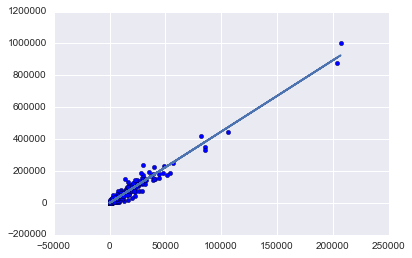

In [68]:
#Plot of Sales in all of 2015 vs. predictions based on the sales of Q1 in 2015
plt.scatter(lySales['Predictor'], lySales['SaleSum15'])
plt.plot(lySales['Predictor'], predictions1)

In [69]:
print 'Predicted sum of sales for 2015:', sum(predictions1)
print 'Actual sum of sales for 2015:', sum(lySales['SaleSum15'])

Predicted sum of sales for 2015: 27867503.1
Actual sum of sales for 2015: 27867503.1


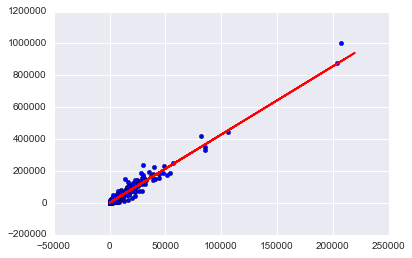

In [46]:

plt.scatter(lySales['Predictor'], lySales['SaleSum15'])
plt.plot(SalesQ116['Predictor'], predictions2,color='r')

In [70]:
print 'Predicted sum of sales for 2016:',sum(predictions2)

Predicted sum of sales for 2016: 28979214.3178


Score: 0.965621226336


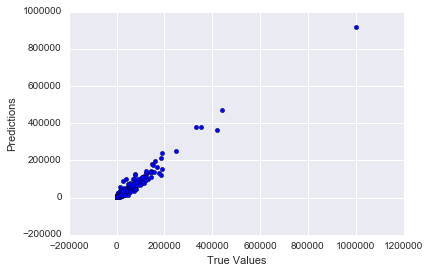

In [71]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

#Creating training and testing variables in so that we can train, test, split
X_train, X_test, y_train, y_test = train_test_split(lySales[['Predictor']], lySales[['SaleSum15']],test_size=0.7)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions3 = lm.predict(X_test)

plt.scatter(y_test, predictions3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)     

Cross-validated scores: [ 0.94951511  0.9289044   0.77343937  0.67589043  0.98657289]
Cross-Predicted Accuracy: 0.958784503318


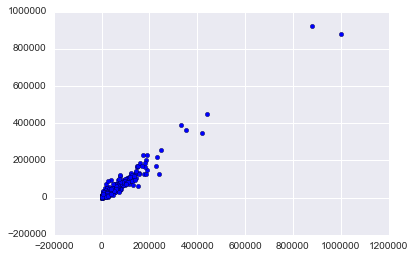

In [72]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics


#Using train, test, split variables to do cross validation
scores = cross_val_score(model, lySales[['Predictor']], lySales[['SaleSum15']], cv=5)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions3 = cross_val_predict(model, lySales[['Predictor']], lySales[['SaleSum15']], cv=5)
plt.scatter(lySales[['SaleSum15']], predictions3)
accuracy = metrics.r2_score(lySales[['SaleSum15']], predictions3)
print "Cross-Predicted Accuracy:", accuracy


**REPORT FOR TAX COMMITTEE**

Taxes are an important revenue stream for any government. In Iowa, around $7 billion total in taxes were taken in in the fiscal year of 2012 (http://www.governing.com/gov-data/state-tax-revenue-data.html). Being able to predict tax revenue is crucial to planning budgets for the state government. A large source of tax revenue are taxes on sales, such as the sale of alcohol.   

Planning state spending is dependent on predicting tax revenue, which in the case of a sales tax, is based on total sales over the year. The tax committee of the Iowa legislature has asked us to see if we can project whether the tax revenue from liquor sales will increase or decrease in the rest of 2016. In order answer this question, we can look at previous years alcohol sales in order to build a linear regression model of the total sales for the rest of the current year.  

To do this we first made a model of 2015 liquor sales using the first few months of 2015 and then compared it to the known sales to see if this is a valid way to build a model for the rest of the year. The following shows that model overlaid on the data for the the entire year of 2015:

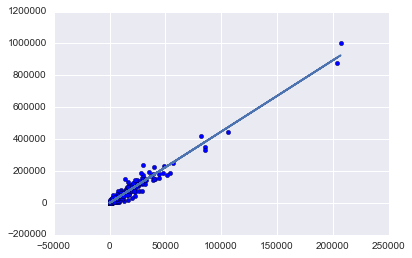

In [76]:
plt.scatter(lySales['Predictor'], lySales['SaleSum15'])
plt.plot(lySales['Predictor'], predictions1)

In [77]:
print 'Predicted sum of sales for 2015:', sum(predictions1)
print 'Actual sum of sales for 2015:', sum(lySales['SaleSum15'])

Predicted sum of sales for 2015: 27867503.1
Actual sum of sales for 2015: 27867503.1


This model is a very good predictor of the total liquor sales in Iowa for 2015, because we have that data and can fit the model to that data. This model has been validated as very accurate. We can use this same model, but instead plug in the data for 2016 up to the current date and see what it predicts for total sales for the rest of 2016. Here are the results of that model: 

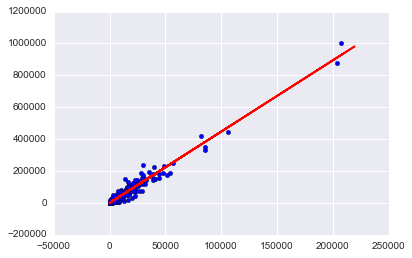

In [79]:
plt.scatter(lySales['Predictor'], lySales['SaleSum15'])
plt.plot(SalesQ116['Predictor'], predictions2,color='r')

In [80]:
print 'Predicted sum of sales for 2016:',sum(predictions2)

Predicted sum of sales for 2016: 28979214.3178


This model shows that the sum of sales for 2016 should surpass those of 2015 by around $1.1 million dollars. This would be a predicted 3.8% increase in the sales revenue for liquor stores in Iowa in 2016. 

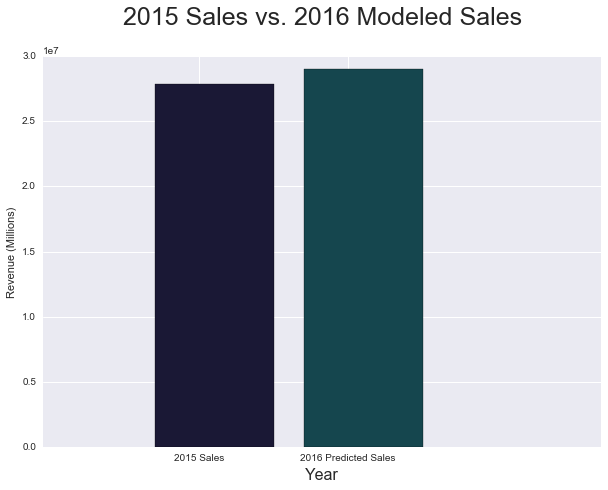

In [93]:

x=['2015 Sales','2016 Predicted Sales']
y=[sum(predictions1), sum(predictions2)]
sns.set_context(rc={"figure.figsize": (10,7)})
nd=np.arange(2)
width=0.6
plt.xticks(nd+width/2., ('2015 Sales','2016 Predicted Sales'))
plt.xlim(-0.75,3)
fig = plt.bar(nd, y, color=sns.color_palette("cubehelix", 8))
plt.title('2015 Sales vs. 2016 Modeled Sales\n' , fontsize=25)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Revenue (Millions)')
plt.show()

This predicted increase in sales should translate into increased tax revenue for the state of Iowa through liquor taxes, barring any unforseen events that occur in 2016 that did not occur in 2015. With just the sales tax of 6% (not including taxes on specific types of alcohol) we predict that there will be an increase in just sales tax revenue to 1.738  million dollars from the 1.672 million dollars collected in 2015.